<a href="https://colab.research.google.com/github/Logan-Bogesvang/IS_4487_Tokyo/blob/main/day3_lab_bogesvang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Lab, IS 4487

Outline

Repeat exercises from Lab 2, for practice, but with the *SuperStore Retail Orders* dataset

- Loading installed packages
- Inspect data
- Clean data
- Summarize data
- Explore plot types and search for insights

Please use the Gemini AI tool to get coding ideas.



# Notebook Instructions
- Remember to save a copy of the notebook in Drive so that you can save your changes.
- Complete the Assignment Tasks.
- When you are done revising this notebook save your changes to GitHub and upload the URL for the file to Canvas for the assignment.
- Some of these assignments ask you to do things we have not covered yet.  Use AI to come up with a solution.

# Load Libraries

➡️ Assignment Tasks
- Load Pandas

In [22]:
!pip install pandas
import pandas as pd


# Load Data

In [24]:
!pip install pandas
import pandas as pd

ss = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv")

# Summarize and Review Data

➡️ Assignment Tasks

- Describe or profile the dataframe

In [25]:
print(ss.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB
None


In [26]:
print(ss.describe())

           order_id       quantity  product_price
count  56045.000000   56006.000000   56045.000000
mean   61668.066340       3.348498    6195.540505
std     7508.229651     422.646565   35784.727716
min    45079.000000       1.000000       2.290000
25%    55644.000000       1.000000       7.950000
50%    61869.000000       1.000000     475.600000
75%    68097.000000       2.000000     914.620000
max    74147.000000  100000.000000  235481.000000


In [27]:
print(ss.head())

   order_id  order_date order_year_month  customer_name               city  \
0     51188  2021-07-01          2021-07  Audrey Blanco  North Cherylmouth   
1     51187  2021-07-01          2021-07    Isaac Allen         Traceyland   
2     51199  2021-07-02          2021-07     Ian Morgan          Dylanberg   
3     51241  2021-07-04          2021-07     Alexa Bell     Lake Tracytown   
4     51297  2021-07-08          2021-07     Casey Diaz        Byrdchester   

              state_province  quantity  \
0  NEW HAMPSHIRE                   3.0   
1  WEST VIRGINIA                   4.0   
2  SOUTH DAKOTA                    5.0   
3  WISCONSIN                       1.0   
4  MISSISSIPPI                     1.0   

                                        product_name product_line  \
0  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
1  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
2  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
3 

# Prepare Data

➡️ Assignment Tasks
- Remove rows with empty (NULL) values
- Locate outliers in any of the variables.   Filter them out if they appear to be mistakes; keep them if they are exceptional cases.
- Create a new field: total_purchase. This should be product_price x quantity.

In [28]:
ss_cleaned = ss.dropna()

In [29]:
print(ss.columns)

numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']

numerical_cols = [col for col in numerical_cols if col in ss.columns]

Q1 = ss[numerical_cols].quantile(0.25)
Q3 = ss[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((ss[numerical_cols] < lower_bound) | (ss[numerical_cols] > upper_bound)).any(axis=1)

print(ss[outliers])

Index(['order_id', 'order_date', 'order_year_month', 'customer_name', 'city',
       'state_province', 'quantity', 'product_name', 'product_line',
       'product_price'],
      dtype='object')
Empty DataFrame
Columns: [order_id, order_date, order_year_month, customer_name, city, state_province, quantity, product_name, product_line, product_price]
Index: []


In [30]:
print(ss.columns)

ss['total_purchase'] = ss['product_price'] * ss['quantity']

Index(['order_id', 'order_date', 'order_year_month', 'customer_name', 'city',
       'state_province', 'quantity', 'product_name', 'product_line',
       'product_price'],
      dtype='object')


Check that your cleaning worked

In [31]:
print("Shape before cleaning:", ss.shape)
ss_cleaned = ss.dropna()
print("Shape after cleaning:", ss_cleaned.shape)

print("Number of missing values before cleaning:", ss.isna().sum().sum())
print("Number of missing values after cleaning:", ss_cleaned.isna().sum().sum())

Shape before cleaning: (56045, 11)
Shape after cleaning: (55500, 11)
Number of missing values before cleaning: 1090
Number of missing values after cleaning: 0


# Summarize Data

➡️ Assignment Tasks
- Calculate the average price per year-month
- Calculate the total revenue per year month

Does more cleaning need to be done? If so, do it and then recreate the above summary tables.

In [39]:
print(ss.columns)

ss['Order Date'] = pd.to_datetime(ss['order_date'], errors='coerce')

ss['YearMonth'] = ss['Order Date'].dt.to_period('M')

average_price_per_month = ss.groupby('YearMonth')['product_price'].mean()

print(average_price_per_month)

Index(['order_id', 'order_date', 'order_year_month', 'customer_name', 'city',
       'state_province', 'quantity', 'product_name', 'product_line',
       'product_price', 'total_purchase', 'Order Date', 'YearMonth'],
      dtype='object')
YearMonth
1922-06    8550.073390
2020-01    3172.420978
2020-02    3217.667212
2020-03    3242.706768
2020-04    3194.646275
2020-05    3192.571359
2020-06    3151.209623
2020-07    1959.974251
2020-08    1921.246151
2020-09    1740.987143
2020-10    1800.830762
2020-11    1693.386178
2020-12    1716.205675
2021-01    1774.621612
2021-02    1763.226404
2021-03    1761.580940
2021-04    1691.161107
2021-05    1643.897690
2021-06    1696.822340
2021-07    4284.421507
2021-08    6573.423124
2021-09    7086.669690
2021-10    6647.267347
2021-11    6727.223221
2021-12    6001.624570
2022-01    6537.449793
2022-02    6805.364523
2022-03    5851.014440
2022-04    6467.757094
2022-05    7108.572205
2022-06    6955.332040
2029-06       3.640000
2029-07    3263

In [38]:
ss['Order Date'] = pd.to_datetime(ss['order_date'], errors='coerce')
ss['YearMonth'] = ss['Order Date'].dt.to_period('M')

revenue_per_month = ss.groupby('YearMonth')['total_purchase'].sum()

print(revenue_per_month)

YearMonth
1922-06      979559.95
2020-01     4745149.93
2020-02      530915.09
2020-03      710043.07
2020-04      651707.84
2020-05      657669.70
2020-06      668056.44
2020-07      484113.64
2020-08      534106.43
2020-09      341233.48
2020-10      401585.26
2020-11      323436.76
2020-12      559483.05
2021-01      429458.43
2021-02      470781.45
2021-03      468580.53
2021-04      488745.56
2021-05      540842.34
2021-06      529408.57
2021-07    10495978.77
2021-08    47239239.96
2021-09    50625473.56
2021-10    53123132.48
2021-11    50213508.07
2021-12    60364261.25
2022-01    58216747.14
2022-02    58175468.30
2022-03    57460161.50
2022-04    63217187.94
2022-05    73964841.92
2022-06    67965140.91
2029-06          19.55
2029-07      517358.82
2029-08          39.94
Freq: M, Name: total_purchase, dtype: float64


# Plot Data

➡️ Assignment Tasks
- Produce two plots that show patterns or relationships in the data.
- Interpret these patterns for potential value to the business.  

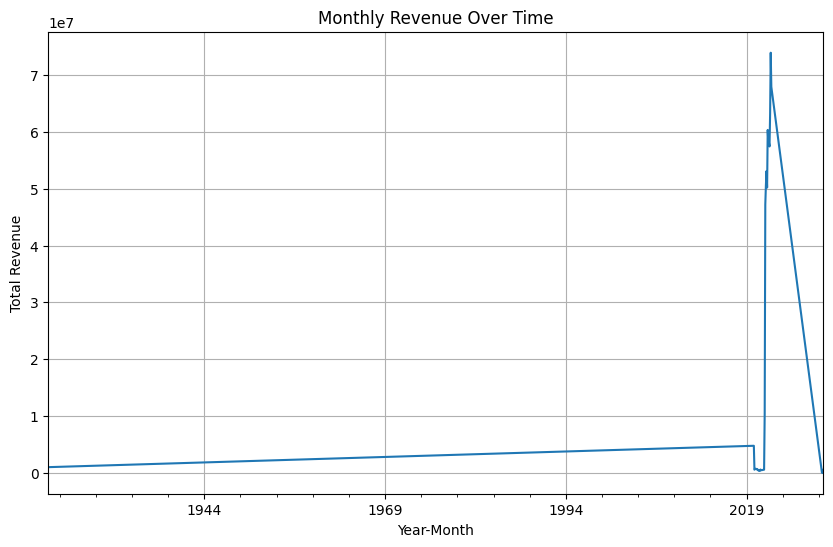

In [41]:
import matplotlib.pyplot as plt

revenue_per_month = ss.groupby('YearMonth')['total_purchase'].sum()
revenue_per_month.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Revenue Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

<ipython-input-43-dacd9037e985>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping


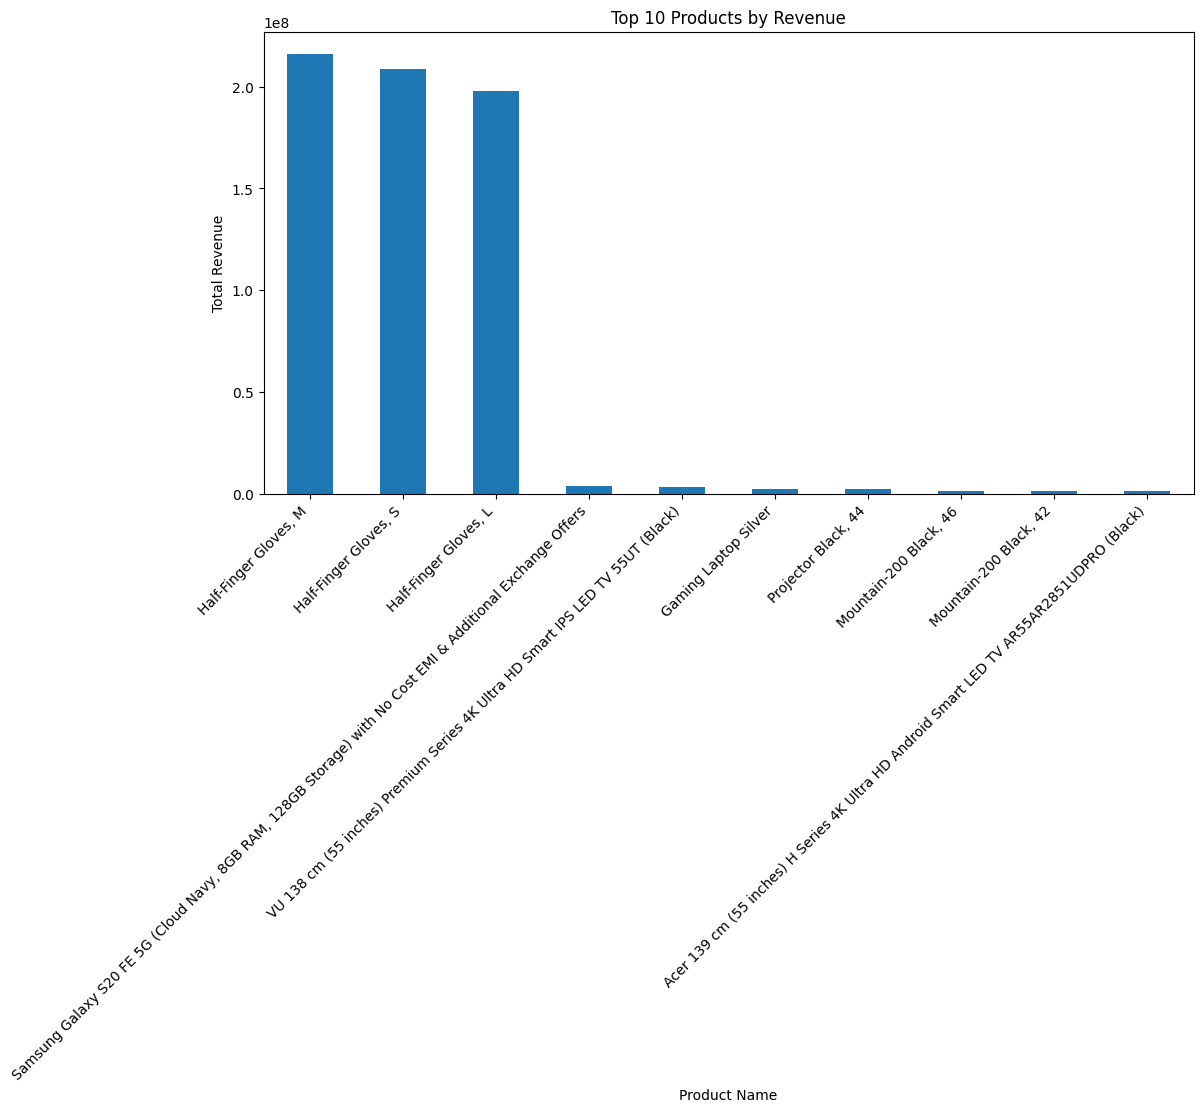

In [43]:
top_products = ss.groupby('product_name')['total_purchase'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

After 2019, there was a significant spike in monthly revenue. Half-finger gloves are the best performing product.